# **Wgranie i łączenie danych:**

W pierwszej kolejnosći pobrałem plik, który został wysłany mi na maila, rozpakowałem go na własnym komputerze. Przeanalizowałem polecenie oraz pliki, postanowiłem, że będe je wgrywał bezpośrednio z mojego urządzenia. Z uwagi na to ze katalog "Zadanie_Dane_Temperatura" zawiera więcej plików postanowiłem go "zipować" i nastepnie zaciągnąłem dane do środowska Google Colab.


In [12]:
from google.colab import files
import zipfile
import os

uploaded = files.upload()

zip_name = "Zadanie_Dane_Temperatura.zip"

with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall("Zadanie_Dane_Temperatura")

os.listdir("Zadanie_Dane_Temperatura")


Saving Customer_Industry.xlsx to Customer_Industry (1).xlsx
Saving dimDates.csv to dimDates (1).csv
Saving Posting_Volumes to Posting_Volumes (1)
Saving X_ClientORDERS.xlsx to X_ClientORDERS (1).xlsx
Saving Zadanie_Dane_Temperatura.zip to Zadanie_Dane_Temperatura (1).zip


['Zadanie_Dane_Temperatura']

Poniżej kod do scalenia wszytskich plików z rozszerzeniem  csv z katalogu "Zadanie_Dane_Temperatura" - pozowli to nam stworzyć jedną ramkę danych z pogodą gotową do łączenia z resztą zbiorów.


In [13]:
import pandas as pd
import glob

csv_files = glob.glob("Zadanie_Dane_Temperatura/Zadanie_Dane_Temperatura/*.csv")

df_temp = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

df_temp['Data'] = pd.to_datetime(
    df_temp['Rok'].astype(str) + '-' + df_temp['Miesiac'].astype(str).str.zfill(2) + '-' + df_temp['Dzien'].astype(str).str.zfill(2),
    format='%Y-%m-%d'
)

df_temp.sort_values('Data', inplace=True)

df_temp.head(100)


,Nazwa stacji,Rok,Miesiac,Dzien,Maksymalna temperatura dobowa,Minimalna temperatura dobowa,Srednia temperatura dobowa,Suma dobowa opadow [mm],Pokrywa sniegu [cm],Data
844,KRAKOW,2022,1,1,12.1,9.3,10.4,0.6,0.0,2022-01-01
875,WARSZAWA,2022,1,1,10.6,5.4,7.4,0.0,0.0,2022-01-01
845,KRAKOW,2022,1,2,12.6,7.3,9.2,0.0,0.0,2022-01-02
876,WARSZAWA,2022,1,2,9.4,3.1,6.3,0.0,0.0,2022-01-02
846,KRAKOW,2022,1,3,11.1,6.3,9.0,1.9,0.0,2022-01-03
...,...,...,...,...,...,...,...,...,...,...
1808,WARSZAWA,2022,2,17,9.5,5.1,6.6,0.0,0.0,2022-02-17
1781,KRAKOW,2022,2,18,11.0,3.6,6.5,0.1,0.0,2022-02-18
1809,WARSZAWA,2022,2,18,7.0,3.3,4.7,0.0,0.0,2022-02-18
1782,KRAKOW,2022,2,19,13.6,5.7,8.5,0.0,0.0,2022-02-19


In [14]:
df_dates = pd.read_csv("dimDates.csv")
df_dates.head()


,Unnamed: 0,datePk,dateId,dateYear,dateYearISO,dateMonthYear,dateWeekYearISO,dateQuarterYear,dateMonth,dateDay,...,firstDayNoHolidayNoSaturdayAfter,firstDayNoHolidayNoSundayAfter,firstDayNoHolidayNoSaturdayAfterData,firstDayNoSaturdayNoHolidayOrSundayHolidayName,firstDayNoSaturdayNoHolidayOrSundayHolidayIsHoliday,firstDayNoSaturdayNoHolidayOrSundayHoliday,isThuHolyday,isFriHolyday,isSatHolyday,isWeekendParcelServiceBreakInd
0,0,20230324,2023-03-24,2023,2023,2023-03-01,T12-2023,Q1-2023,3,24,...,20230326,20230325,20230326,SUN,0,20230326,0,0,0,0.0
1,1,20210701,2021-07-01,2021,2021,2021-07-01,T26-2021,Q3-2021,7,1,...,20210702,20210702,20210702,FRI,0,20210702,0,0,0,0.0
2,2,20210713,2021-07-13,2021,2021,2021-07-01,T28-2021,Q3-2021,7,13,...,20210714,20210714,20210714,WED,0,20210714,0,0,0,0.0
3,3,20240413,2024-04-13,2024,2024,2024-04-01,T15-2024,Q2-2024,4,13,...,20240414,20240415,20240414,SUN,0,20240414,0,0,0,0.0
4,4,20240715,2024-07-15,2024,2024,2024-07-01,T29-2024,Q3-2024,7,15,...,20240716,20240716,20240716,TUE,0,20240716,0,0,0,0.0


In [15]:
df_dates['Data'] = pd.to_datetime(df_dates['dateId'])
df_dates.drop(columns=['Unnamed: 0'], inplace=True)
df_dates[['Data', 'dateWeekYearISO', 'isThuHolyday', 'isWeekendParcelServiceBreakInd']].head()


,Data,dateWeekYearISO,isThuHolyday,isWeekendParcelServiceBreakInd
0,2023-03-24,T12-2023,0,0.0
1,2021-07-01,T26-2021,0,0.0
2,2021-07-13,T28-2021,0,0.0
3,2024-04-13,T15-2024,0,0.0
4,2024-07-15,T29-2024,0,0.0


In [16]:
import pandas as pd
xlsx_orders = pd.ExcelFile("X_ClientORDERS.xlsx")
print("Arkusze w pliku:", xlsx_orders.sheet_names)


Arkusze w pliku: ['MonthlyOrders']


In [17]:
df_orders = pd.read_excel(xlsx_orders, sheet_name="MonthlyOrders")
df_orders.head()


,Date,APM_Orders
0,2023-01-01,117239.498822
1,2023-01-02,64143.840050
2,2023-01-03,61870.034653
3,2023-01-04,61013.341158
4,2023-01-05,55060.134348


In [18]:
df_orders['Data'] = pd.to_datetime(df_orders['Date'])
df_orders.drop(columns=['Date'], inplace=True)
df_orders.head()


,APM_Orders,Data
0,117239.498822,2023-01-01
1,64143.840050,2023-01-02
2,61870.034653,2023-01-03
3,61013.341158,2023-01-04
4,55060.134348,2023-01-05


In [19]:
df_industry = pd.read_excel("Customer_Industry.xlsx")
df_industry.head()


,Customer,Industry
0,Customer_A1,URODA
1,Customer_A10,MODA
2,Customer_A11,BROKERZY
3,Customer_A12,ELEKTRONIKA
4,Customer_A13,URODA


In [20]:
# Usuwam ewentualne spacje
df_industry.columns = df_industry.columns.str.strip()
df_industry['Customer'] = df_industry['Customer'].str.strip()
df_industry['Industry'] = df_industry['Industry'].str.strip()


In [21]:
df_volumes = pd.read_parquet("Posting_Volumes")
df_volumes.head()


,Customer,Date,Product,Volume,CollectionCountry,DeliveryCountry
0,Customer_X,2020-01-01,APM,2281,PL,PL
1,Customer_X,2020-01-01,COURIER,2182,PL,PL
2,Customer_A1,2020-01-01,COURIER,59,PL,PL
3,Customer_A2,2020-01-01,COURIER,145,PL,PL
4,Customer_A3,2020-01-01,APM,65,PL,PL


In [22]:
df_merged = df_volumes.merge(df_dates, left_on='Date', right_on='Data', how='left')
df_merged = df_merged.merge(df_industry, on='Customer', how='left')
df_merged.head()


,Customer,Date,Product,Volume,CollectionCountry,DeliveryCountry,datePk,dateId,dateYear,dateYearISO,...,firstDayNoHolidayNoSaturdayAfterData,firstDayNoSaturdayNoHolidayOrSundayHolidayName,firstDayNoSaturdayNoHolidayOrSundayHolidayIsHoliday,firstDayNoSaturdayNoHolidayOrSundayHoliday,isThuHolyday,isFriHolyday,isSatHolyday,isWeekendParcelServiceBreakInd,Data,Industry
0,Customer_X,2020-01-01,APM,2281,PL,PL,20200101,2020-01-01,2020,2020,...,20200102,THU,0,20200102,0,0,0,NaN,2020-01-01,MARKETPLACE
1,Customer_X,2020-01-01,COURIER,2182,PL,PL,20200101,2020-01-01,2020,2020,...,20200102,THU,0,20200102,0,0,0,NaN,2020-01-01,MARKETPLACE
2,Customer_A1,2020-01-01,COURIER,59,PL,PL,20200101,2020-01-01,2020,2020,...,20200102,THU,0,20200102,0,0,0,NaN,2020-01-01,URODA
3,Customer_A2,2020-01-01,COURIER,145,PL,PL,20200101,2020-01-01,2020,2020,...,20200102,THU,0,20200102,0,0,0,NaN,2020-01-01,ELEKTRONIKA
4,Customer_A3,2020-01-01,APM,65,PL,PL,20200101,2020-01-01,2020,2020,...,20200102,THU,0,20200102,0,0,0,NaN,2020-01-01,URODA


In [23]:
df_merged = df_merged.merge(df_orders, on='Data', how='left')


In [24]:
df_temp_avg = df_temp.groupby('Data').mean(numeric_only=True).reset_index()
df_temp_avg.head()


,Data,Rok,Miesiac,Dzien,Maksymalna temperatura dobowa,Minimalna temperatura dobowa,Srednia temperatura dobowa,Suma dobowa opadow [mm],Pokrywa sniegu [cm]
0,2022-01-01,2022.0,1.0,1.0,11.35,7.35,8.90,0.30,0.0
1,2022-01-02,2022.0,1.0,2.0,11.00,5.20,7.75,0.00,0.0
2,2022-01-03,2022.0,1.0,3.0,10.50,6.25,8.25,0.95,0.0
3,2022-01-04,2022.0,1.0,4.0,8.80,4.85,6.85,0.75,0.0
4,2022-01-05,2022.0,1.0,5.0,9.65,3.20,5.40,2.70,0.0


In [25]:
# Dołączenie danych pogodowych per dzień
df_merged = df_merged.merge(df_temp_avg, on='Data', how='left')


# **Analiza historyczna wolumenów (na dzień 12 czerwca 2024):**

In [26]:
#Wyciągnięcie zakresów dat:
from datetime import datetime, timedelta
# Data referencyjna
ref_date = datetime(2024, 6, 12)
# Ostatni pełny tydzień (sobota–piątek)
week_end = ref_date - timedelta(days=5)  # piątek 07.06.2024
week_start = week_end - timedelta(days=6)  # sobota 01.06.2024
# Ostatni pełny miesiąc – maj
month_start = datetime(2024, 5, 1)
month_end = datetime(2024, 5, 31)
# Analogiczny tydzień i miesiąc z poprzedniego roku
week_start_prev = week_start.replace(year=2023)
week_end_prev = week_end.replace(year=2023)
month_start_prev = month_start.replace(year=2023)
month_end_prev = month_end.replace(year=2023)


Agregacja wolumenów dla każdego okresu
Będziemy porównywać:

- wolumeny paczek

- w rozbiciu na: branża + kraj nadania + kraj doręczenia

- dla 4 okresów: tydzień i miesiąc (2024 + 2023)



In [27]:
def agreguj_okres(df, start, end, etykieta):
    df_okres = df[(df['Date'] >= start) & (df['Date'] <= end)]
    df_grp = (
        df_okres.groupby(['Industry', 'CollectionCountry', 'DeliveryCountry'])['Volume']
        .sum()
        .reset_index()
        .rename(columns={'Volume': etykieta})
    )
    return df_grp

# Agregacja dla 4 okresów
week_2024 = agreguj_okres(df_merged, week_start, week_end, "Tydzień_2024")
week_2023 = agreguj_okres(df_merged, week_start_prev, week_end_prev, "Tydzień_2023")
month_2024 = agreguj_okres(df_merged, month_start, month_end, "Miesiąc_2024")
month_2023 = agreguj_okres(df_merged, month_start_prev, month_end_prev, "Miesiąc_2023")


In [28]:
#Łączenie wyników i porównania rok do roku
# Łączenie tygodni
week_compare = week_2024.merge(week_2023, on=['Industry', 'CollectionCountry', 'DeliveryCountry'], how='outer')
# Obliczenia
week_compare['Zmiana_nominalna'] = week_compare['Tydzień_2024'] - week_compare['Tydzień_2023']
week_compare['Zmiana_%'] = (week_compare['Zmiana_nominalna'] / week_compare['Tydzień_2023']) * 100
# To samo dla miesięcy
month_compare = month_2024.merge(month_2023, on=['Industry', 'CollectionCountry', 'DeliveryCountry'], how='outer')
month_compare['Zmiana_nominalna'] = month_compare['Miesiąc_2024'] - month_compare['Miesiąc_2023']
month_compare['Zmiana_%'] = (month_compare['Zmiana_nominalna'] / month_compare['Miesiąc_2023']) * 100


In [29]:
# Podgląd 10 wyników z tygodnia
week_compare.sort_values('Zmiana_nominalna', ascending=False).head(10)

,Industry,CollectionCountry,DeliveryCountry,Tydzień_2024,Tydzień_2023,Zmiana_nominalna,Zmiana_%
5,ELEKTRONIKA,PL,PL,1232961,741839,491122,66.203314
9,MODA,PL,PL,1549493,1118360,431133,38.550467
2,BROKERZY,PL,PL,1557338,1192491,364847,30.595367
12,URODA,PL,PL,1429744,1096288,333456,30.416825
6,MARKETPLACE,PL,PL,1465880,1209319,256561,21.215329
1,BROKERZY,PL,FR,95950,22336,73614,329.575573
10,URODA,FR,PL,149995,89937,60058,66.777856
7,MODA,FR,PL,47316,29409,17907,60.889524
0,BROKERZY,FR,PL,62464,57695,4769,8.265881
3,ELEKTRONIKA,FR,PL,21712,30390,-8678,-28.555446


In [30]:
# porównanie charakterystyki dni
def charakterystyka_okresu(df, start, end):
    okres = df[(df['Data'] >= start) & (df['Data'] <= end)]
    return {
        'Liczba dni': len(okres),
        'Liczba weekendów': okres['isWeekendParcelServiceBreakInd'].sum(),
        'Liczba świąt (czwartek/piątek)': okres[['isThuHolyday', 'isFriHolyday']].sum().sum()
    }

# Porównanie tygodnia
char_week_2024 = charakterystyka_okresu(df_dates, week_start, week_end)
char_week_2023 = charakterystyka_okresu(df_dates, week_start_prev, week_end_prev)
# Porównanie miesiąca
char_month_2024 = charakterystyka_okresu(df_dates, month_start, month_end)
char_month_2023 = charakterystyka_okresu(df_dates, month_start_prev, month_end_prev)

char_week_2024, char_week_2023, char_month_2024, char_month_2023

({'Liczba dni': 7,
  'Liczba weekendów': np.float64(0.0),
  'Liczba świąt (czwartek/piątek)': np.int64(1)},
 {'Liczba dni': 7,
  'Liczba weekendów': np.float64(0.0),
  'Liczba świąt (czwartek/piątek)': np.int64(1)},
 {'Liczba dni': 31,
  'Liczba weekendów': np.float64(0.0),
  'Liczba świąt (czwartek/piątek)': np.int64(7)},
 {'Liczba dni': 31,
  'Liczba weekendów': np.float64(0.0),
  'Liczba świąt (czwartek/piątek)': np.int64(0)})

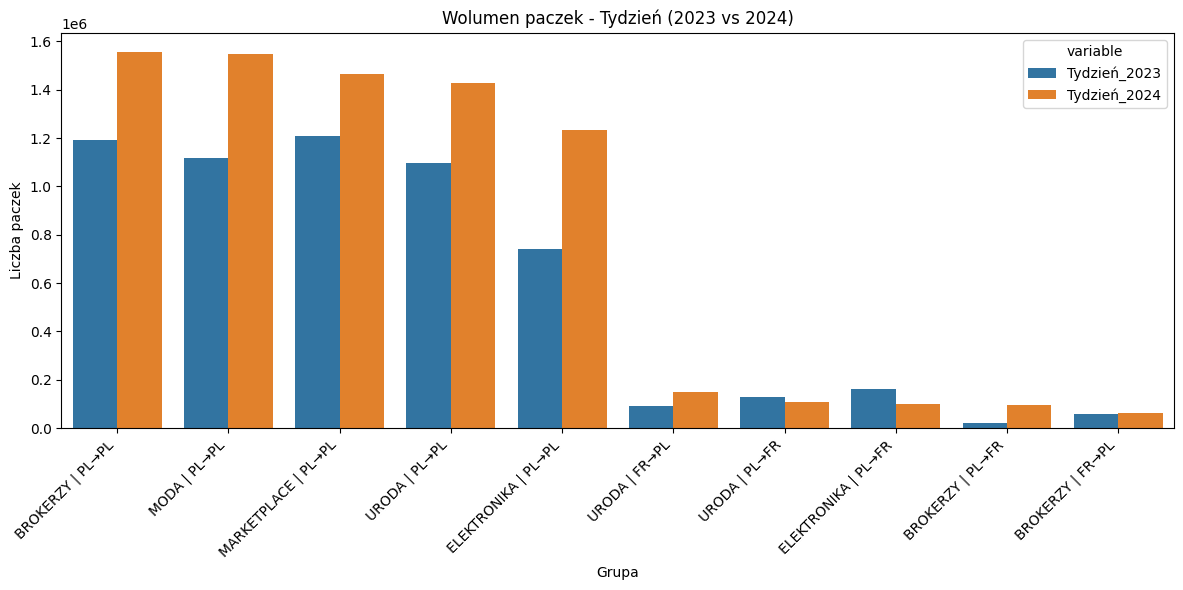

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
# Wybieramy top 10 według wolumenu z 2024
top_week = week_compare.sort_values('Tydzień_2024', ascending=False).head(10)
# Tworzymy kategorię jako etykietę branża + kraje
top_week['Grupa'] = top_week['Industry'] + ' | ' + top_week['CollectionCountry'] + '→' + top_week['DeliveryCountry']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_week.melt(id_vars='Grupa', value_vars=['Tydzień_2023', 'Tydzień_2024']),
            x='Grupa', y='value', hue='variable')
plt.title("Wolumen paczek - Tydzień (2023 vs 2024)")
plt.ylabel("Liczba paczek")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


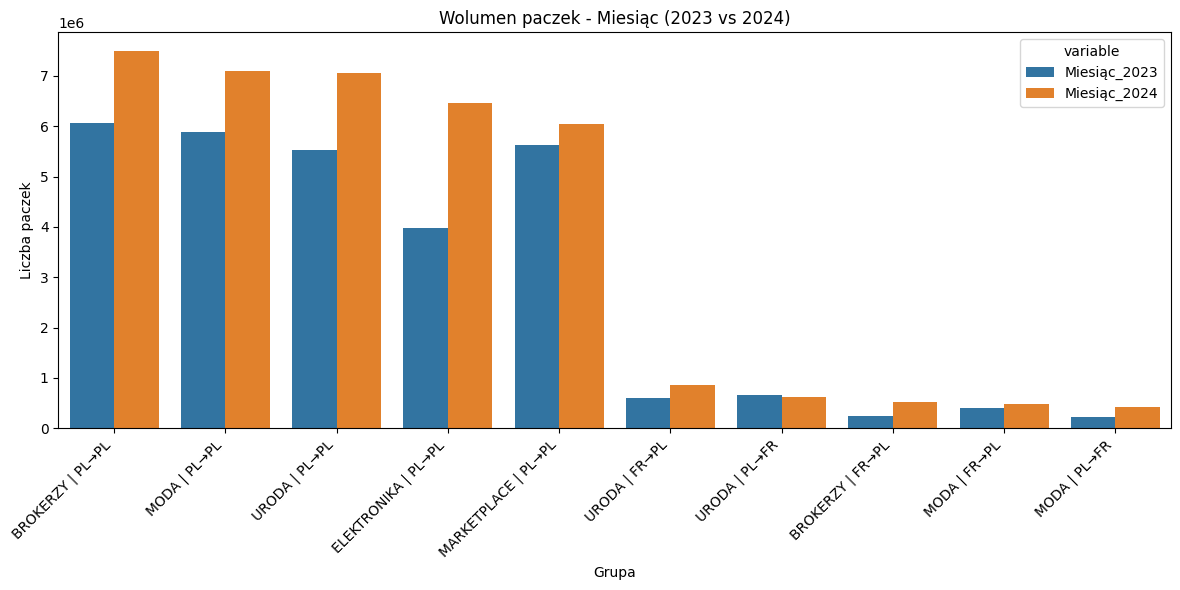

In [32]:
# Top 10 dla miesiąca
top_month = month_compare.sort_values('Miesiąc_2024', ascending=False).head(10)
top_month['Grupa'] = top_month['Industry'] + ' | ' + top_month['CollectionCountry'] + '→' + top_month['DeliveryCountry']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_month.melt(id_vars='Grupa', value_vars=['Miesiąc_2023', 'Miesiąc_2024']),
            x='Grupa', y='value', hue='variable')
plt.title("Wolumen paczek - Miesiąc (2023 vs 2024)")
plt.ylabel("Liczba paczek")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Model


In [33]:
from sklearn.model_selection import train_test_split

# Filtrujemy tylko dane do końca czerwca 2024
train_df = df_merged[df_merged['Date'] <= '2024-06-30'].copy()
# Tworzymy cechy daty
train_df['Rok'] = train_df['Date'].dt.year
train_df['Miesiac'] = train_df['Date'].dt.month
train_df['DzienTygodnia'] = train_df['Date'].dt.dayofweek
# Dodajemy rozszerzone cechy do zbioru treningowego
train_df['czy_weekend'] = train_df['DzienTygodnia'].isin([5, 6]).astype(int)
train_df['czy_swięto'] = (
    train_df['isThuHolyday'].fillna(0) +
    train_df['isFriHolyday'].fillna(0) +
    train_df['isWeekendParcelServiceBreakInd'].fillna(0)
).clip(upper=1).astype(int)
train_df['czy_poczatek_mies'] = (train_df['Date'].dt.day < 15).astype(int)
train_df['interakcja_kluczowa'] = train_df['Product'] + '_' + train_df['Industry']
train_df['czy_poniedzialek'] = (train_df['Date'].dt.weekday == 0).astype(int)
train_df['czy_dzien_po_swiece'] = train_df['isWeekendParcelServiceBreakInd'].shift(1).fillna(0)
train_df['Volume_lag_1'] = train_df.groupby('Customer')['Volume'].shift(1)
train_df['APM_ratio'] = train_df['APM_Orders'] / (train_df['Volume'] + 1)
# Wybieramy cechy wejściowe (z poprawionymi nazwami pogodowymi!)
features = [
    'Product', 'Industry', 'CollectionCountry', 'DeliveryCountry',
    'Rok', 'Miesiac', 'DzienTygodnia',
    'Srednia temperatura dobowa', 'Suma dobowa opadow [mm]',
    'isWeekendParcelServiceBreakInd', 'isThuHolyday', 'isFriHolyday',
    'czy_poniedzialek', 'czy_dzien_po_swiece', 'Volume_lag_1', 'APM_ratio'
]
# One-hot encoding z nowymi cechami
X = pd.get_dummies(train_df[features])
# RegEx nazwy kolumn dla XGBoost
X.columns = X.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)
# Zmienna celu – liczba przesyłek
y = train_df['Volume']


In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
# Podział danych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
# Model XGBoost
model = XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
# Trenujemy model
model.fit(X_train, y_train)
# Predykcja
y_pred = model.predict(X_test)
# Ewaluacja
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² score: {r2:.3f}")


MAE: 1069.43
RMSE: 2647.07
R² score: 0.946


In [35]:
# Tworzymy dane do prognozowania na okres od lipca 2024 do grudnia 2024
predict_df = df_merged[(df_merged['Date'] >= '2024-07-01') & (df_merged['Date'] <= '2024-12-31')].copy()
# Przygotowujemy cechy podobnie jak wcześniej
predict_df['Rok'] = predict_df['Date'].dt.year
predict_df['Miesiac'] = predict_df['Date'].dt.month
predict_df['DzienTygodnia'] = predict_df['Date'].dt.dayofweek
# Dodajemy dodatkowe cechy
predict_df['czy_weekend'] = predict_df['DzienTygodnia'].isin([5, 6]).astype(int)
predict_df['czy_swięto'] = (
    predict_df['isThuHolyday'].fillna(0) +
    predict_df['isFriHolyday'].fillna(0) +
    predict_df['isWeekendParcelServiceBreakInd'].fillna(0)
).clip(upper=1).astype(int)
predict_df['czy_poczatek_mies'] = (predict_df['Date'].dt.day < 15).astype(int)
predict_df['interakcja_kluczowa'] = predict_df['Product'] + '_' + predict_df['Industry']
predict_df['czy_poniedzialek'] = (predict_df['Date'].dt.weekday == 0).astype(int)
predict_df['czy_dzien_po_swiece'] = predict_df['isWeekendParcelServiceBreakInd'].shift(1).fillna(0)
predict_df['Volume_lag_1'] = predict_df.groupby('Customer')['Volume'].shift(1)
predict_df['APM_ratio'] = predict_df['APM_Orders'] / (predict_df['Volume'] + 1)
# Wybieramy cechy do prognozowania
predict_features = [
    'Product', 'Industry', 'CollectionCountry', 'DeliveryCountry',
    'Rok', 'Miesiac', 'DzienTygodnia', 'czy_weekend', 'czy_swięto',
    'czy_poczatek_mies', 'Srednia temperatura dobowa', 'Suma dobowa opadow [mm]',
    'isWeekendParcelServiceBreakInd', 'isThuHolyday', 'isFriHolyday',
    'czy_poniedzialek', 'czy_dzien_po_swiece', 'Volume_lag_1', 'APM_ratio'
]
# One-hot encoding dla cech
X_predict = pd.get_dummies(predict_df[predict_features])
# RegEx nazwy kolumn
X_predict.columns = X_predict.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)
# Dopasowanie kolumn do modelu
X_predict = X_predict.reindex(columns=X.columns, fill_value=0)
# Prognozowanie
predicted_volumes = model.predict(X_predict)
# Tworzymy ramkę danych z prognozami
predict_df['PredictedVolume'] = predicted_volumes
# Wyświetlenie wyników
predict_df[['Date', 'Customer', 'CollectionCountry', 'DeliveryCountry', 'PredictedVolume']].head()


,Date,Customer,CollectionCountry,DeliveryCountry,PredictedVolume
228442,2024-07-01,Customer_X,PL,PL,121902.867188
228443,2024-07-01,Customer_X,PL,PL,122680.171875
228444,2024-07-01,Customer_A1,PL,PL,4898.077148
228445,2024-07-01,Customer_A2,PL,PL,12807.273438
228446,2024-07-01,Customer_A3,PL,PL,1483.142822


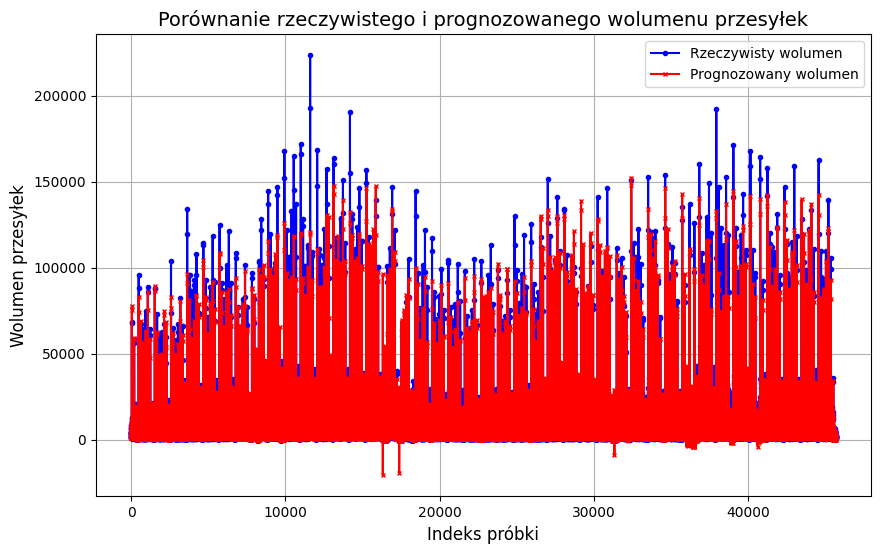

In [36]:
import matplotlib.pyplot as plt

# Przewidywanie wolumenów na zbiorze testowym
y_pred = model.predict(X_test)
# Porównanie rzeczywistych wolumenów i prognozowanych
plt.figure(figsize=(10,6))
# Rysujemy wykres
plt.plot(y_test.values, label='Rzeczywisty wolumen', color='blue', linestyle='-', marker='o', markersize=3)
plt.plot(y_pred, label='Prognozowany wolumen', color='red', linestyle='-', marker='x', markersize=3)
# Dodajemy tytuł, etykiety osi i legendę
plt.title('Porównanie rzeczywistego i prognozowanego wolumenu przesyłek', fontsize=14)
plt.xlabel('Indeks próbki', fontsize=12)
plt.ylabel('Wolumen przesyłek', fontsize=12)
plt.legend(loc='best')
# Pokaż wykres
plt.grid(True)
plt.show()


In [37]:
from datetime import datetime
import pandas as pd

df_dates['dateId'] = pd.to_datetime(df_dates['dateId'])

def predict_simple(date_str):
    # Konwersja daty z tekstu
    date = pd.to_datetime(date_str, format="%d-%m-%Y")
    # Jednorazowe dane wejściowe (możesz edytować te wartości)
    customer = "X"
    product = "APM"
    collection_country = "PL"
    delivery_country = "FR"
    industry = "MODA"
    apm_orders = 1000
    volume_lag_1 = 900
    # Przygotowanie 1 rekordu
    row = pd.DataFrame([{
        'Date': date,
        'Customer': customer,
        'Product': product,
        'CollectionCountry': collection_country,
        'DeliveryCountry': delivery_country,
        'Industry': industry,
        'APM_Orders': apm_orders,
        'Volume_lag_1': volume_lag_1,
        'interakcja_kluczowa': f"{product}_{industry}",
        'czy_weekend': int(date.weekday() >= 5),
        'czy_poczatek_mies': int(date.day < 15),
        'czy_poniedzialek': int(date.weekday() == 0),
        'czy_dzien_po_swiecie': 0,
        'Rok': date.year,
        'Miesiac': date.month,
        'DzienTygodnia': date.weekday(),
        'APM_ratio': apm_orders / (volume_lag_1 + 1)
    }])
    # Uzupełnienie świąt z df_dates
    row = row.merge(df_dates[['dateId', 'isWeekendParcelServiceBreakInd', 'isThuHolyday', 'isFriHolyday', 'isSatHolyday']],
                    left_on='Date', right_on='dateId', how='left')
    for col in ['isWeekendParcelServiceBreakInd', 'isThuHolyday', 'isFriHolyday', 'isSatHolyday']:
        row[col] = row[col].fillna(0)
    # Przygotowanie cech jak przy trenowaniu
    features = [
        'Product', 'Industry', 'CollectionCountry', 'DeliveryCountry',
        'Rok', 'Miesiac', 'DzienTygodnia', 'czy_weekend', 'czy_poczatek_mies',
        'czy_poniedzialek', 'czy_dzien_po_swiecie', 'interakcja_kluczowa',
        'isWeekendParcelServiceBreakInd', 'isThuHolyday', 'isFriHolyday', 'isSatHolyday',
        'Volume_lag_1', 'APM_ratio'
    ]

    # One-hot encoding + dopasowanie do modelu
    X = pd.get_dummies(row[features])
    X.columns = X.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)
    X = X.reindex(columns=model.feature_names_in_, fill_value=0)
    # Predykcja
    prediction = model.predict(X)[0]
    print(f" Prognozowany wolumen na {date.strftime('%d-%m-%Y')}: {round(prediction)}")


In [38]:
predict_simple("04-03-2025")

 Prognozowany wolumen na 04-03-2025: 16947


# Funkcja do analizy historycznej na dowolny dzień

In [39]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd

def analyze_historical_volumes(df, ref_date):
    # Konwersja daty wejściowej
    if isinstance(ref_date, str):
        ref_date = datetime.strptime(ref_date, "%Y-%m-%d")

    # WYZNACZ DATY
    # Ostatni pełny tydzień: sobota–piątek
    last_saturday = ref_date - timedelta(days=(ref_date.weekday() + 2) % 7 + 7)
    last_friday = last_saturday + timedelta(days=6)

    # Rok wcześniej
    last_saturday_prev = last_saturday.replace(year=last_saturday.year - 1)
    last_friday_prev = last_friday.replace(year=last_friday.year - 1)

    # Ostatni pełny miesiąc
    last_month = (ref_date.replace(day=1) - timedelta(days=1)).replace(day=1)
    last_month_end = (ref_date.replace(day=1) - timedelta(days=1))

    last_month_prev = last_month.replace(year=last_month.year - 1)
    last_month_prev_end = last_month_end.replace(year=last_month_end.year - 1)

    # AGREGACJA
    def aggregate_volume(df_slice, label):
        return df_slice.groupby(
            ['Industry', 'CollectionCountry', 'DeliveryCountry']
        )['Volume'].sum().reset_index().rename(columns={'Volume': label})

    def compare_periods(df1, df2, label1, label2):
        a = aggregate_volume(df1, label1)
        b = aggregate_volume(df2, label2)
        df_combined = pd.merge(a, b, on=['Industry', 'CollectionCountry', 'DeliveryCountry'], how='outer').fillna(0)
        df_combined['Change_nominal'] = df_combined[label1] - df_combined[label2]
        df_combined['Change_pct'] = np.where(
            df_combined[label2] == 0,
            np.nan,
            df_combined['Change_nominal'] / df_combined[label2] * 100
        )
        return df_combined

    # WYCIĄGNIĘCIE DANYCH
    df_periods = {
        'week_current': df[(df['Data'] >= last_saturday) & (df['Data'] <= last_friday)],
        'week_prev': df[(df['Data'] >= last_saturday_prev) & (df['Data'] <= last_friday_prev)],
        'month_current': df[(df['Data'] >= last_month) & (df['Data'] <= last_month_end)],
        'month_prev': df[(df['Data'] >= last_month_prev) & (df['Data'] <= last_month_prev_end)],
    }

    #  LICZENIE DNI TYPU
    def count_day_types(df_slice):
        return {
            'TotalDays': df_slice['Data'].nunique(),
            'WorkingDays': df_slice[
                (df_slice['isWeekendParcelServiceBreakInd'] != True) &
                (df_slice['isThuHolyday'] != True)
            ].shape[0],
            'Holidays': df_slice[df_slice['isThuHolyday'] == True].shape[0],
            'Weekends': df_slice[df_slice['isWeekendParcelServiceBreakInd'] == True].shape[0]
        }

    #  ANALIZA
    summary_week = compare_periods(
        df_periods['week_current'], df_periods['week_prev'], 'Week_2024', 'Week_2023'
    )
    summary_month = compare_periods(
        df_periods['month_current'], df_periods['month_prev'], 'Month_2024', 'Month_2023'
    )

    meta = {
        'week_current_days': count_day_types(df_periods['week_current']),
        'week_prev_days': count_day_types(df_periods['week_prev']),
        'month_current_days': count_day_types(df_periods['month_current']),
        'month_prev_days': count_day_types(df_periods['month_prev']),
    }

    return summary_week, summary_month, meta


In [40]:
week_summary, month_summary, meta_info = analyze_historical_volumes(df_merged, "2024-06-12")


In [41]:
import pandas as pd
pd.set_option('display.max_rows', 100)
display(week_summary)
display(month_summary)
print(meta_info)


,Industry,CollectionCountry,DeliveryCountry,Week_2024,Week_2023,Change_nominal,Change_pct
0,BROKERZY,FR,PL,62464,57695,4769,8.265881
1,BROKERZY,PL,FR,95950,22336,73614,329.575573
2,BROKERZY,PL,PL,1557338,1192491,364847,30.595367
3,ELEKTRONIKA,FR,PL,21712,30390,-8678,-28.555446
4,ELEKTRONIKA,PL,FR,101732,161295,-59563,-36.927989
5,ELEKTRONIKA,PL,PL,1232961,741839,491122,66.203314
6,MARKETPLACE,PL,PL,1465880,1209319,256561,21.215329
7,MODA,FR,PL,47316,29409,17907,60.889524
8,MODA,PL,FR,49340,84052,-34712,-41.298244
9,MODA,PL,PL,1549493,1118360,431133,38.550467


,Industry,CollectionCountry,DeliveryCountry,Month_2024,Month_2023,Change_nominal,Change_pct
0,BROKERZY,FR,PL,520513,245040,275473,112.419605
1,BROKERZY,PL,FR,316275,271807,44468,16.360138
2,BROKERZY,PL,PL,7493300,6062220,1431080,23.606534
3,ELEKTRONIKA,FR,PL,276812,292262,-15450,-5.286353
4,ELEKTRONIKA,PL,FR,391644,212308,179336,84.469733
5,ELEKTRONIKA,PL,PL,6462891,3982216,2480675,62.293833
6,MARKETPLACE,PL,PL,6051916,5619704,432212,7.691010
7,MODA,FR,PL,485674,406147,79527,19.580841
8,MODA,PL,FR,416935,229768,187167,81.459124
9,MODA,PL,PL,7105366,5894780,1210586,20.536576


{'week_current_days': {'TotalDays': 7, 'WorkingDays': 948, 'Holidays': 158, 'Weekends': 0}, 'week_prev_days': {'TotalDays': 7, 'WorkingDays': 888, 'Holidays': 148, 'Weekends': 0}, 'month_current_days': {'TotalDays': 31, 'WorkingDays': 4424, 'Holidays': 474, 'Weekends': 0}, 'month_prev_days': {'TotalDays': 31, 'WorkingDays': 4562, 'Holidays': 0, 'Weekends': 0}}


In [42]:
!pip install xlsxwriter


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 7.0 MB/s eta 0:00:00


In [43]:
import pandas as pd
from google.colab import files

filename = "analiza_historyczna_2024_06_12.xlsx"
# Eksport do Excela
with pd.ExcelWriter(filename, engine='xlsxwriter') as writer:
    week_summary.to_excel(writer, sheet_name='Tydzień', index=False)
    month_summary.to_excel(writer, sheet_name='Miesiąc', index=False)
    pd.DataFrame.from_dict(meta_info, orient='index').to_excel(writer, sheet_name='Metadane')

# files.download(filename)
